In [54]:
import numpy as np
import pandas as pd
import pydeck as pdk
import os
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns

import json
import time

In [65]:
plt.style.use('dark_background')

In [79]:
plt.rcParams.update({
    'font.size': 22,
})

# Summarize 

Summarize the results of the collaborations and citations analysis paths

In [2]:
dataDir = '../data'

## Overview Stats

In [3]:
arts = []
with open(join(dataDir, 'articleMetadata.json')) as f:
    for i,line in enumerate(f):
        thisArt = json.loads(line)
        if 'isValid' in thisArt.keys():
            arts.append(thisArt)

In [4]:
print('{} total articles'.format(len(arts)))

88797 total articles


In [5]:
# calculate the total number of collaborations
# defined as any two individuals working together on the same paper
nTotalCollabs = 0
for art in arts:
    nAuthors = art['nAuthors']
    nCollabs = nAuthors * (nAuthors-1) / 2 # calculate unique pairwise collaborations among authors
    nTotalCollabs += nCollabs

print('{} total collaborations'.format(nTotalCollabs))
    

2700407.0 total collaborations


## Cross-geo Collaborations

In [115]:
collabs_df = pd.read_csv(join(dataDir, 'processed', 'collaborations.csv'))

In [116]:
collabs_df.shape

(342900, 10)

In [117]:
collabs_df.head()

,PMCID,ePubDate,geoID_A,geoID_B,lat_A,lng_A,fmtAddr_A,lat_B,lng_B,fmtAddr_B
0,PMC7581440,10-23-2020,ChIJ7faBuL7or0cRYDuslG2sJQQ,ChIJAVkDPzdOqEcRcDteW0YgIQQ,52.480909,10.550783,"38518 Gifhorn, Germany",52.520007,13.404954,"Berlin, Germany"
1,PMC7581502,10-23-2020,ChIJc8r44c9unUcRDZsdKH0cIJ0,ChIJuRMYfoNhsUcRoDrWe_I9JgQ,47.269212,11.404102,"Innsbruck, Austria",53.551085,9.993682,"Hamburg, Germany"
2,PMC7581692,10-23-2020,ChIJmb1k2ko-eUgRqdwTAv26rVE,ChIJra6o8IHuBUgRMO0NHlI3DQQ,53.800755,-1.549077,"Leeds, UK",47.218371,-1.553621,"Nantes, France"
3,PMC7581692,10-23-2020,ChIJmb1k2ko-eUgRqdwTAv26rVE,ChIJsZ3dJQevthIRAuiUKHRWh60,53.800755,-1.549077,"Leeds, UK",43.610769,3.876716,"Montpellier, France"
4,PMC7581692,10-23-2020,ChIJmb1k2ko-eUgRqdwTAv26rVE,ChIJt2BwZIrfekgRAW4XP28E3EI,53.800755,-1.549077,"Leeds, UK",53.408371,-2.991573,"Liverpool, UK"


### Visualize geography of all collabs

In [118]:
with open('mapboxAPI_key.txt', 'r') as f:
    MAPBOX_TOKEN = f.read().rstrip('\n')

In [119]:
# visualize using pydeck
arc_layer = pdk.Layer(
    "ArcLayer",
    data=collabs_df,
    great_circle=False,
    get_width=1,
    get_height=.6,
    get_source_position=["lng_A", "lat_A"],
    get_target_position=["lng_B", "lat_B"],
    get_tilt=15,
    get_source_color=[240, 100, 0, 10],
    get_target_color=[240, 100, 0, 10],
    pickable=False,
    auto_highlight=True
)

view_state = pdk.ViewState(latitude=37.7576171, longitude=-122.5776844, bearing=45, pitch=50, zoom=8,)

TOOLTIP_TEXT = {"html": "{fmtAddr_A} to {fmtAddr_B}"}
r = pdk.Deck(
    arc_layer, 
    initial_view_state=view_state, 
    mapbox_key=MAPBOX_TOKEN,
    tooltip=TOOLTIP_TEXT
)

# this is really heavy
#r.to_html("crossGeoCollabs.html")

### Collaborations by GEO ID
Get stats on each unique geoID in the dataset

In [6]:
collabsByGeo_df = pd.read_csv(join(dataDir, 'processed', 'collabsByGeo.csv'))

In [7]:
topTotal = collabsByGeo_df.sort_values('nTotal', ascending=False).head(10)
topTotal[['formattedAddr', 'nTotal', 'lat', 'lng', 'geoID']]

,formattedAddr,nTotal,lat,lng,geoID
4,"London, UK",11655,51.507351,-0.127758,ChIJdd4hrwug2EcRmSrV3Vo6llI
19,"Boston, MA, USA",8453,42.360083,-71.058880,ChIJGzE9DS1l44kRoOhiASS_fHg
17,"New York, NY, USA",8329,40.712775,-74.005973,ChIJOwg_06VPwokRYv534QaPC8g
13,"Paris, France",6171,48.856614,2.352222,ChIJD7fiBh9u5kcRYJSMaMOCCwQ
190,"Milan, Metropolitan City of Milan, Italy",5639,45.464203,9.189982,ChIJ53USP0nBhkcRjQ50xhPN_zw
74,"Madrid, Spain",5474,40.416775,-3.703790,ChIJgTwKgJcpQg0RaSKMYcHeNsQ
233,"Barcelona, Spain",5287,41.385064,2.173404,ChIJ5TCOcRaYpBIRCmZHTz37sEQ
56,"Rome, Metropolitan City of Rome, Italy",5010,41.902784,12.496365,ChIJu46S-ZZhLxMROG5lkwZ3D7k
116,"Beijing, China",4923,39.904200,116.407396,ChIJuSwU55ZS8DURiqkPryBWYrk
95,"Toronto, ON, Canada",4561,43.653226,-79.383184,ChIJpTvG15DL1IkRd8S0KlBVNTI


In [8]:
topUnique = collabsByGeo_df.sort_values('nUnique', ascending=False).head(10)
topUnique[['formattedAddr', 'nUnique', 'lat', 'lng', 'geoID']]

,formattedAddr,nUnique,lat,lng,geoID
4,"London, UK",1837,51.507351,-0.127758,ChIJdd4hrwug2EcRmSrV3Vo6llI
17,"New York, NY, USA",1597,40.712775,-74.005973,ChIJOwg_06VPwokRYv534QaPC8g
19,"Boston, MA, USA",1419,42.360083,-71.058880,ChIJGzE9DS1l44kRoOhiASS_fHg
13,"Paris, France",1233,48.856614,2.352222,ChIJD7fiBh9u5kcRYJSMaMOCCwQ
190,"Milan, Metropolitan City of Milan, Italy",1203,45.464203,9.189982,ChIJ53USP0nBhkcRjQ50xhPN_zw
74,"Madrid, Spain",1165,40.416775,-3.703790,ChIJgTwKgJcpQg0RaSKMYcHeNsQ
265,"Seattle, WA, USA",1100,47.606209,-122.332071,ChIJVTPokywQkFQRmtVEaUZlJRA
233,"Barcelona, Spain",1099,41.385064,2.173404,ChIJ5TCOcRaYpBIRCmZHTz37sEQ
116,"Beijing, China",1088,39.904200,116.407396,ChIJuSwU55ZS8DURiqkPryBWYrk
95,"Toronto, ON, Canada",1085,43.653226,-79.383184,ChIJpTvG15DL1IkRd8S0KlBVNTI


## Citation Network

In [9]:
citations = []
with open(join(dataDir, 'articleCitations.json')) as f:
    for i,line in enumerate(f):
        thisCit = json.loads(line)
        citations.append(thisCit)

In [10]:
cite_df = pd.DataFrame(citations)
cite_df.drop('citations', axis=1, inplace=True)

In [11]:
cite_df.head()

,PMCID,nCitations,nCovidCitations
0,PMC7405836,39,38
1,PMC7373339,8,8
2,PMC7459861,5,5
3,PMC7260568,18,18
4,PMC7744810,0,0


### Proportion of articles that have been cited
Show a cumulative distribution of all articles by number of citations for each article

(-1.0, 30.0)

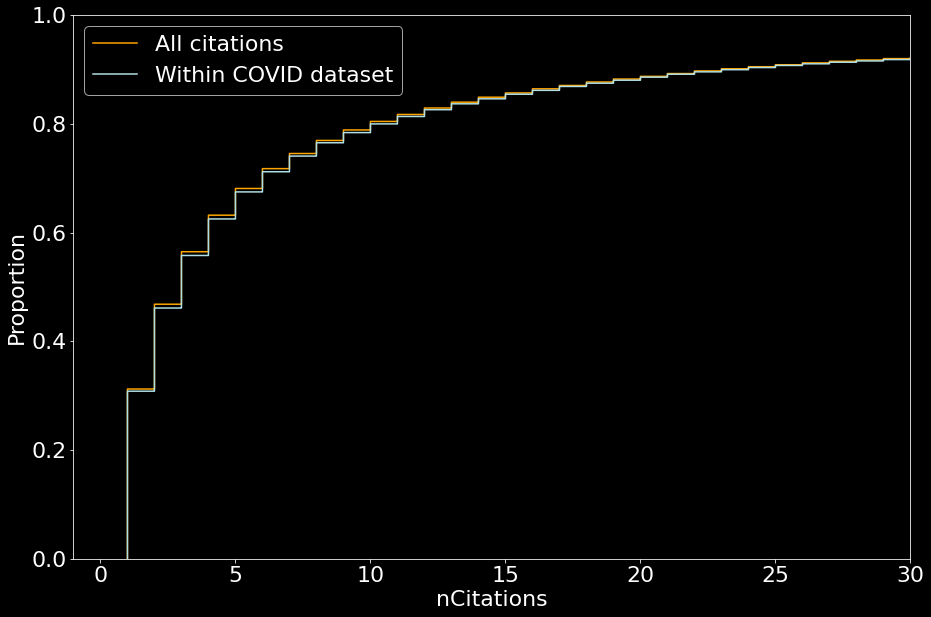

In [97]:
fig = plt.figure(figsize=(15,10))
sns.ecdfplot(data=cite_df[cite_df['nCitations']>0], x="nCitations", c="orange")
sns.ecdfplot(data=cite_df[cite_df['nCovidCitations']>0], x="nCovidCitations", c="powderblue")
plt.legend(labels=['All citations', 'Within COVID dataset'])
plt.xlim([-1, 30])

### Simple stats on citations

In [96]:
nArts = cite_df.shape[0]
nAnyCite = cite_df[cite_df['nCitations'] > 0].shape[0]
n10 = cite_df[cite_df['nCitations'] >= 10].shape[0]
n25 = cite_df[cite_df['nCitations'] >= 25].shape[0]
n50 = cite_df[cite_df['nCitations'] >= 50].shape[0]
n100 = cite_df[cite_df['nCitations'] >= 100].shape[0]
n1000 = cite_df[cite_df['nCitations'] >= 1000].shape[0]


print('{} ({:.1f}%) of articles have at least 1 citation'.format(nAnyCite, nAnyCite / nArts * 100))
print('{} ({:.1f}%) of articles have at least 10 citation'.format(n10, n10 / nArts * 100))
print('{} ({:.1f}%) of articles have at least 25 citation'.format(n25, n25 / nArts * 100))
print('{} ({:.1f}%) of articles have at least 50 citation'.format(n50, n50 / nArts * 100))
print('{} ({:.1f}%) of articles have at least 100 citation'.format(n100, n100 / nArts * 100))
print('{} ({:.1f}%) of articles have at least 1000 citation'.format(n1000, n1000 / nArts * 100))

34443 (39.6%) of articles have at least 1 citation
7271 (8.4%) of articles have at least 10 citation
3264 (3.8%) of articles have at least 25 citation
1714 (2.0%) of articles have at least 50 citation
805 (0.9%) of articles have at least 100 citation
34 (0.0%) of articles have at least 1000 citation


In [113]:
# most cited
mostCited = cite_df.sort_values('nCitations', ascending=False)
mostCited_pmcids = mostCited[:10]['PMCID'].to_list()

for idx, i in enumerate(mostCited_pmcids):
    thisArt = [x for x in arts if x['PMCID'] == i][0]
    print('#{} - {} (cited by {})'.format(idx+1, i, mostCited.iloc[idx]['nCitations']))
    print('{}'.format(thisArt['title']))
    print('{}'.format(thisArt['URL']))
    print('-'*10)


#1 - PMC7159299 (cited by 8515)
Clinical features of patients infected with 2019 novel coronavirus in Wuhan, China
https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=GetRecord&identifier=oai:pubmedcentral.nih.gov:7159299&metadataPrefix=pmc
----------
#2 - PMC7092819 (cited by 5265)
Clinical Characteristics of Coronavirus Disease 2019 in China
https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=GetRecord&identifier=oai:pubmedcentral.nih.gov:7092819&metadataPrefix=pmc
----------
#3 - PMC7270627 (cited by 5087)
Clinical course and risk factors for mortality of adult inpatients with COVID-19 in Wuhan, China: a retrospective cohort study
https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=GetRecord&identifier=oai:pubmedcentral.nih.gov:7270627&metadataPrefix=pmc
----------
#4 - PMC7092803 (cited by 4780)
A Novel Coronavirus from Patients with Pneumonia in China, 2019
https://www.ncbi.nlm.nih.gov/pmc/oai/oai.cgi?verb=GetRecord&identifier=oai:pubmedcentral.nih.gov:7092803&metadataPrefix=pmc
-------